# Breast Cancer Wisconsin (Diagnostic) Data Set

In this project, we will be predicting whether a breast cancer is benign or malignant through different Machine Learning Classification Models.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(12, 8)})

First of all, attach the breast cancer dataset in this project directory.

## Data Description

You can obtain the dataset from this link:<br>
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

## Data loading

This is where we will load the dataset, and conduct data exploration and analysis

In [68]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [70]:
print('Total rows:', df.shape[0])
print('Total features:', df.shape[1])

Total rows: 569
Total features: 33


In [71]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [72]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [73]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [74]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Exploratory Data Analysis

Let's now visualize our dataset to better interpret it.

### Bar Graph

Firstly, we need to check whether our dataset is balanced or not. We can do this using countplot.

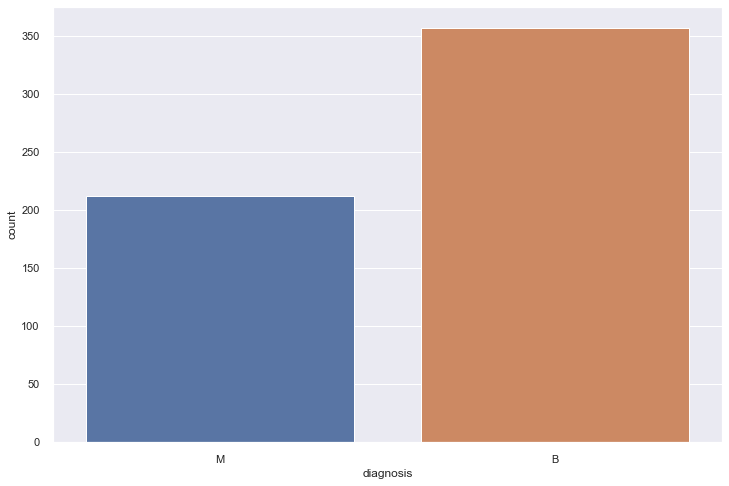

In [77]:
sns.countplot(x='diagnosis', data=df)
plt.show()

We can deduce that our dataset is indeed quite imbalanced. There are more benign cases than Malignant cases in the
dataset.

### Histogram

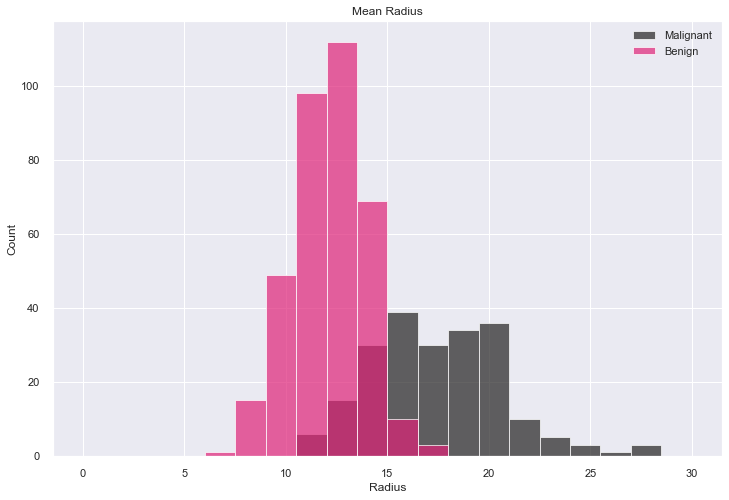

In [78]:
fig, ax = plt.subplots()
m = ax.hist(df[df["diagnosis"] == "M"]['radius_mean'], bins=20, range=(0, 30), 
            label = "Malignant", alpha=0.7, color='#232121')
b = ax.hist(df[df["diagnosis"] == "B"]['radius_mean'], bins=20, range=(0, 30), 
            label = "Benign", alpha=0.7, color='#df2378')
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Mean Radius")
plt.legend()
plt.show()

as we are seeing that there is a difference in radius based on the type of breast cancer present

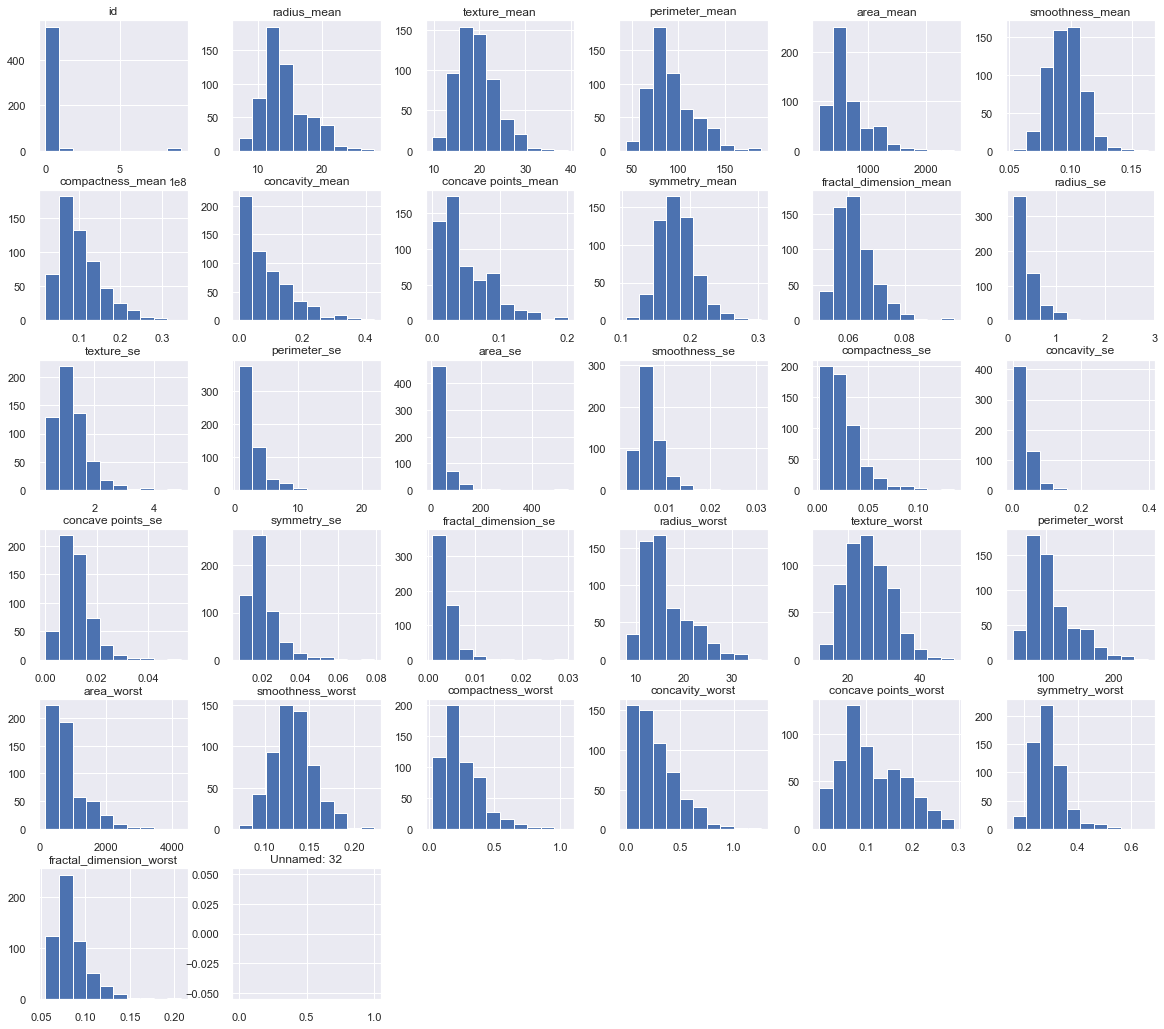

In [79]:
df.hist(figsize=(20,18));

Through this multi-histogram visualization, we can analyze the distribution of every column in the dataset, such as the range, maximum and minimum value, and also the trend of the data.

### Box Plot

After that, we can use a box plot to analyze the range and distribution of every column in our dataset based on a five
number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about
your outliers and what their values are.

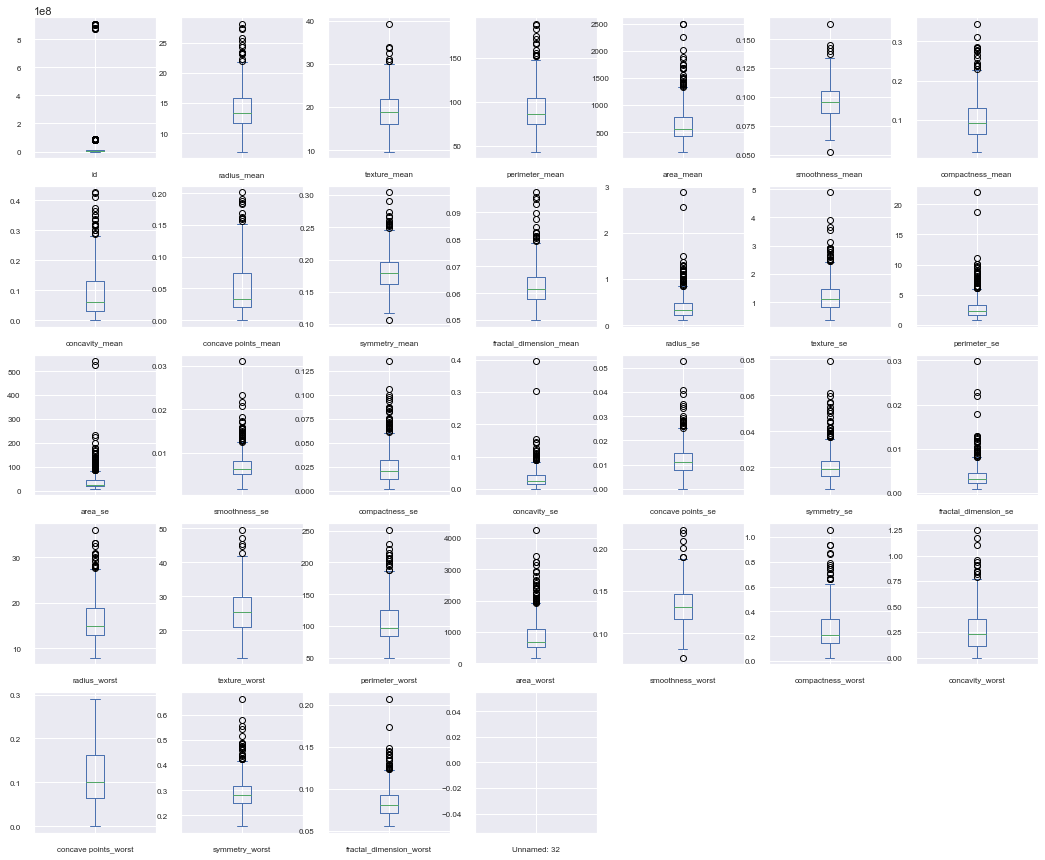

In [80]:
df.plot(kind='box', subplots=True, layout=(5,7), fontsize=8, figsize=(18,15));

### Heatmap

We will use a heatmap to visualize the correlation between columns in the dataset.


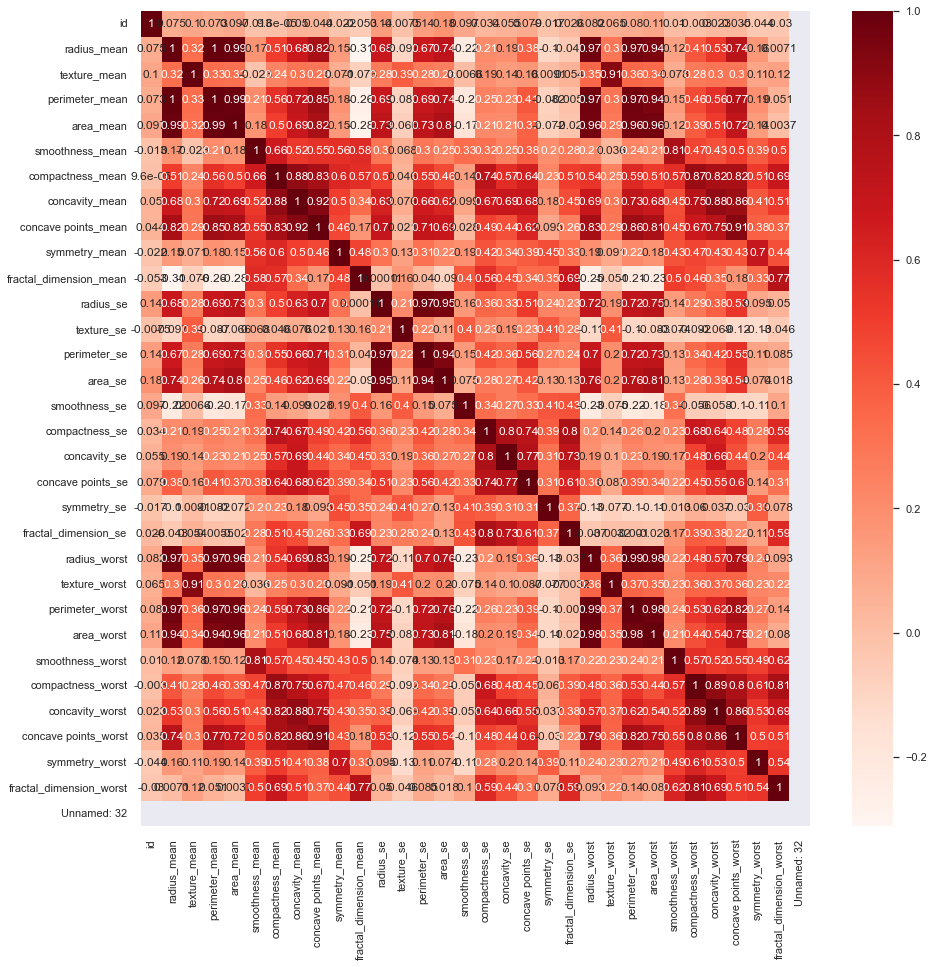

In [81]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, ax=ax)
plt.show()

## Data Preprocessing

### Label encoder, Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [83]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [84]:
df['diagnosis'].unique()

array([1, 0])

### Drop irrelevant rows

In [85]:
df = df.drop(['id' ,'Unnamed: 32'],axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Handling Numerical Values (Standard Scaler)

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler()
mx = MinMaxScaler()

In [87]:
# make a copy of dataframe
scaled_features_clear = df.copy()

col_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
features = scaled_features_clear[col_names]


scaler = sc.fit(features.values)
features = scaler.transform(features.values)

scaled_features_clear[col_names] = features

In [88]:
scaled_features_clear.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

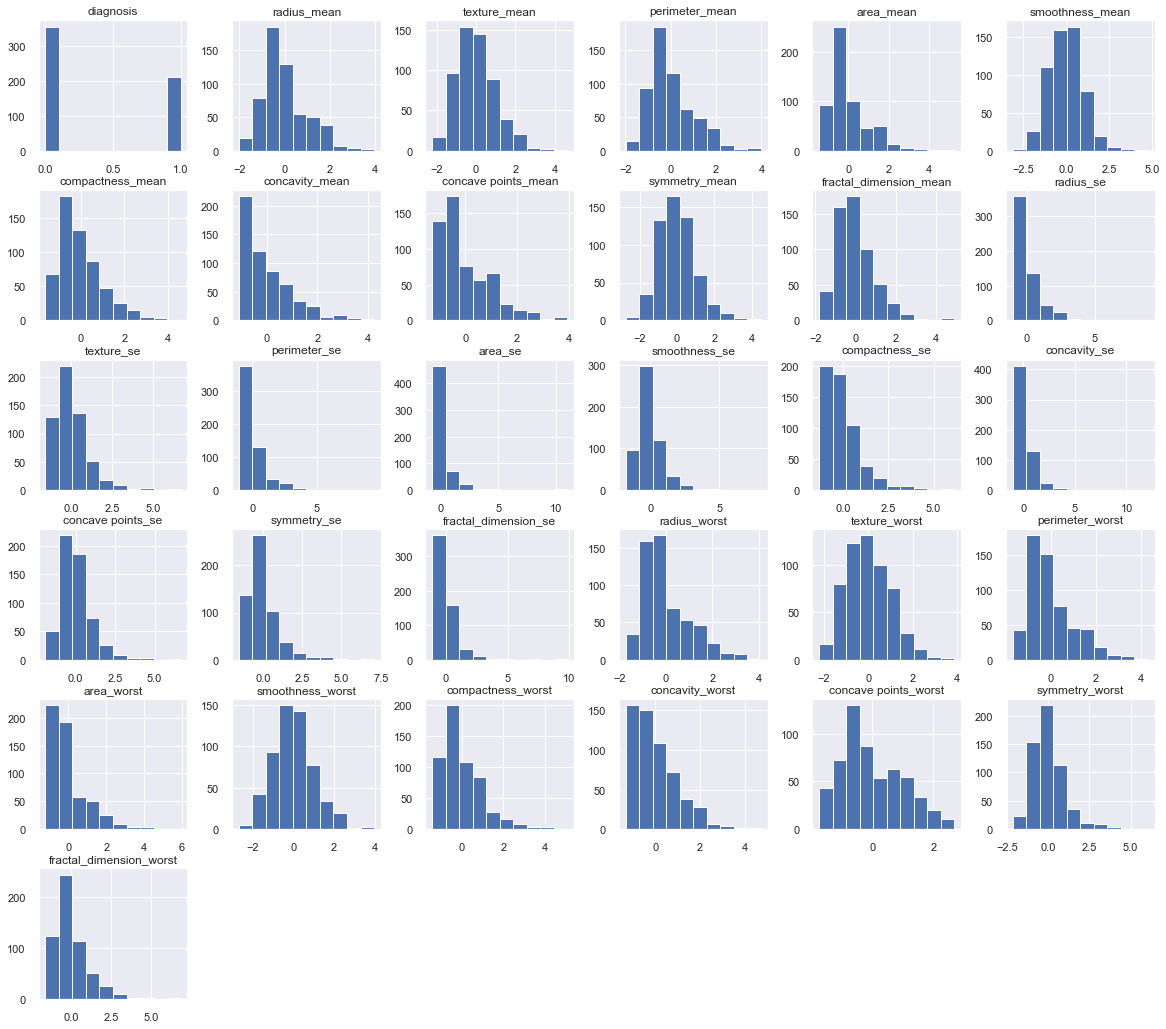

In [89]:
scaled_features_clear.hist(figsize=(20,18));

## Feature Selection

The following code aims to: 
1. Find every column's correlation with the target variable that has been encoded.
2. Give the columns a name.
3. Drop irrelevant rows, which are ID and the target variable itself.
4. Sort Values in descending order, since the features with negative correlation have very low values.
5. Reset Index, and drop the extra column created.

In [90]:
cor_target = scaled_features_clear.corrwith(df["diagnosis"]).reset_index()
cor_target.columns = ["Feature","Corr Value"]
cor_target.sort_values(by="Corr Value", ascending=False, inplace=True)
cor_target.drop([0],inplace=True)
cor_target.reset_index(inplace=True)
cor_target.drop("index", axis=1, inplace=True)
cor_target.head(10)

,Feature,Corr Value
0,concave points_worst,0.793566
1,perimeter_worst,0.782914
2,concave points_mean,0.776614
3,radius_worst,0.776454
4,perimeter_mean,0.742636
5,area_worst,0.733825
6,radius_mean,0.730029
7,area_mean,0.708984
8,concavity_mean,0.696360
9,concavity_worst,0.659610


According to https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf ,
The relationship between two variables is generally considered strong when their r value is larger than 0.7. The
correlation r measures the strength of the linear relationship between two quantitative variables.
As a result, we want to select Features that have a correlation value greater than 0.7 only.

In [91]:
relevant_features = cor_target.loc[cor_target['Corr Value'] > 0.7]
relevant_features.set_index("Feature", inplace=True)
relevant_features.columns = ["Diagnosis (M OR B)"]


<b>Visualize in a HeatMap

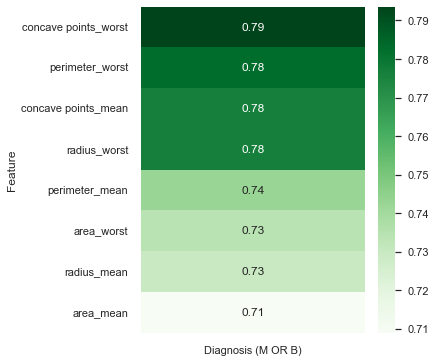

In [92]:
plt.figure(figsize=(5, 6))
sns.heatmap(data=relevant_features, cmap="Greens", annot=True)
plt.show()

We can see a total of 8 features having a correlation greater than 0.7, with the greatest being almost 0.8. This is very
good for data modeling later on.


## Prepare data

In [93]:

features = df[relevant_features.index]
data_vars = features.columns.values.tolist()
data_vars

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean']

In [94]:
y = ['diagnosis']
x = [i for i in data_vars if i not in y]

In [95]:
print("Label :", y)
print("Feature :",x)

Label : ['diagnosis']
Feature : ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean']


## Split Data

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features_clear[x], scaled_features_clear[y], test_size=0.2, random_state=12) 

In [98]:
print('Total Training Data:', x_train.shape[0])
print('Total Testing Data:', x_test.shape[0])

Total Training Data: 455
Total Testing Data: 114


In [99]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 8)
(114, 8)
(455, 1)
(114, 1)


## Model Data SVC 

In [100]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [101]:
svc = svm.SVC(kernel='rbf', C=1, gamma='auto')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

## Test Model SVC 

Accuracy = No of Correct predictions/ Total no of predictions

Precision = True positive / True Positive + False positive

recall = True positive / True positive + False negative

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

In [103]:
print(svc_y_pred)

[1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0]


In [104]:
print(y_test)

     diagnosis
14           1
334          0
457          0
101          0
346          0
..         ...
277          1
109          0
547          0
361          0
304          0

[114 rows x 1 columns]


In [105]:
svc_y_train_pred = svc.predict(x_train)
svc_y_test_pred = svc.predict(x_test)

print('SUPORT VEKTOR MECHINE TRAIN RESULT:')
print('======================================================')
print('Accuracy:', svc.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, svc_y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, svc_y_train_pred))

SUPORT VEKTOR MECHINE TRAIN RESULT:
Accuracy: 0.9604395604395605
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       291
           1       0.97      0.92      0.94       164

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455

Confussion Matrix ------------------------------------
[[286   5]
 [ 13 151]]


In [106]:
print('\n SUPORT VEKTOR MECHINE TESTING RESULT:')
print('======================================================')
print('Accuracy:', svc.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, svc_y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, svc_y_test_pred))


 SUPORT VEKTOR MECHINE TESTING RESULT:
Accuracy: 0.9210526315789473
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        66
           1       0.98      0.83      0.90        48

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114

Confussion Matrix ------------------------------------
[[65  1]
 [ 8 40]]


<AxesSubplot:>

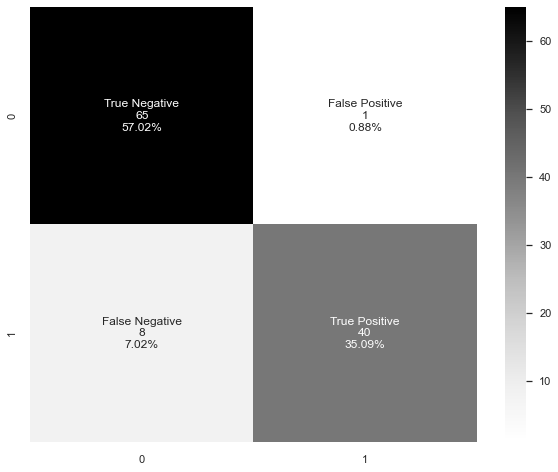

In [107]:
svc_y_pred = svc.predict(x_test)
cf_svc_matrix = confusion_matrix(y_test, svc_y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_svc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_svc_matrix.flatten()/np.sum(cf_svc_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_svc_matrix, annot=labels, fmt='', cmap='Greys')

## Model Data SVC Dengan Hyperparameter Tuning

In [108]:
params = {'C': [0.5, 1, 10,100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [109]:
g = GridSearchCV(SVC(), params, cv=2)
g.fit(x_train, y_train)
print(g.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [110]:
best_params = g.best_params_
svcTun = SVC(**best_params)
svcTun.fit(x_train, y_train)

SVC(C=10, gamma=1)

## Test Model SVC dengan Hyperparameter Tunning

In [111]:
svcTun_y_pred = svcTun.predict(x_test)
print(svcTun_y_pred)

[1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0]


In [112]:
print(y_test)

     diagnosis
14           1
334          0
457          0
101          0
346          0
..         ...
277          1
109          0
547          0
361          0
304          0

[114 rows x 1 columns]


In [113]:
svcTun_y_train_pred =svcTun.predict(x_train)


print('SUPORT VEKTOR MECHINE WiTH HYPERPARAMETER TUNNING TRAIN RESULT:')
print('======================================================')
print('Accuracy:', svcTun.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, svcTun_y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, svcTun_y_train_pred))

SUPORT VEKTOR MECHINE WiTH HYPERPARAMETER TUNNING TRAIN RESULT:
Accuracy: 0.9868131868131869
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       291
           1       0.99      0.97      0.98       164

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455

Confussion Matrix ------------------------------------
[[290   1]
 [  5 159]]


In [114]:
svcTun_y_test_pred = svcTun.predict(x_test)
print('\n SUPORT VEKTOR MECHINE WTTH HYPERPARAMETER TESTING RESULT:')
print('======================================================')
print('Accuracy:', svcTun.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, svcTun_y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, svcTun_y_test_pred))


 SUPORT VEKTOR MECHINE WTTH HYPERPARAMETER TESTING RESULT:
Accuracy: 0.956140350877193
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confussion Matrix ------------------------------------
[[65  1]
 [ 4 44]]


<AxesSubplot:>

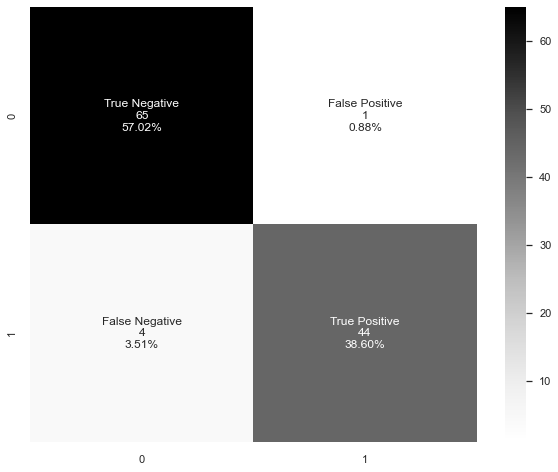

In [115]:
svcTun_y_pred = svcTun.predict(x_test)
cf_svcTun_matrix = confusion_matrix(y_test, svcTun_y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_svcTun_matrix .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_svcTun_matrix .flatten()/np.sum(cf_svcTun_matrix )]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_svcTun_matrix , annot=labels, fmt='', cmap='Greys')

## Model Data KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

## Test Model KNN

In [117]:
knn_y_train_pred = knn.predict(x_train)
print('K Nearst Neighbors Classifier TRAIN RESULT:')
print('======================================================')
print('Accuracy:', knn.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, knn_y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, knn_y_train_pred))


K Nearst Neighbors Classifier TRAIN RESULT:
Accuracy: 0.9692307692307692
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       291
           1       0.97      0.95      0.96       164

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455

Confussion Matrix ------------------------------------
[[286   5]
 [  9 155]]


In [118]:
knn_y_test_pred = knn.predict(x_test)
print('\n K Nearst Neighbors Classifier TESTING RESULT:')
print('======================================================')
print('Accuracy:', knn.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, knn_y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, knn_y_test_pred))


 K Nearst Neighbors Classifier TESTING RESULT:
Accuracy: 0.9473684210526315
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.88      0.93        48

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confussion Matrix ------------------------------------
[[66  0]
 [ 6 42]]


<AxesSubplot:>

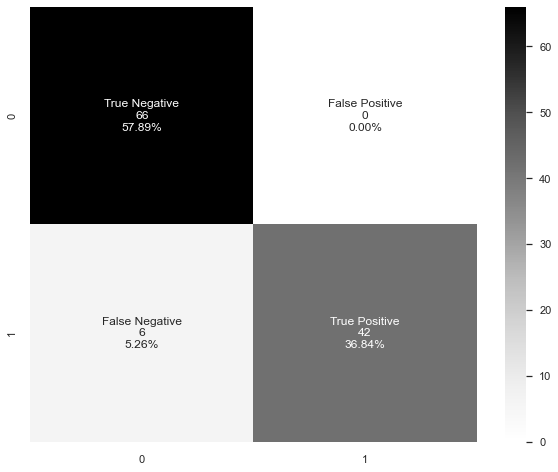

In [119]:
knn_y_pred = knn.predict(x_test)
cf_knn_matrix = confusion_matrix(y_test, knn_y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_knn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_knn_matrix.flatten()/np.sum(cf_knn_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_knn_matrix, annot=labels, fmt='', cmap='Greys')

## Model Data KNN Dengan Hyperparameter Tunning

In [120]:
Knn_params = {'n_neighbors': [3,5,7,9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski','euclidean','manhattan'],
              'p':[1,2]}

In [121]:
KnnTun = GridSearchCV(KNeighborsClassifier(), Knn_params, cv=2)
KnnTun.fit(x_train,y_train)
print(KnnTun.best_params_)

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


## Test Model KNN Dengan Hyperparameter Tunning

In [122]:
KnnTun_y_train_pred = KnnTun.predict(x_train)


print('K Nearst Neighbors Classifier with Hyperparameter Tunning TRAIN RESULT:')
print('======================================================')
print('Accuracy:',KnnTun.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, KnnTun_y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, KnnTun_y_train_pred))


K Nearst Neighbors Classifier with Hyperparameter Tunning TRAIN RESULT:
Accuracy: 0.967032967032967
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       291
           1       0.97      0.94      0.95       164

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.97      0.97      0.97       455

Confussion Matrix ------------------------------------
[[286   5]
 [ 10 154]]


In [123]:
KnnTun_y_test_pred = KnnTun.predict(x_test)
print('\n KNeighbors Classifier WITH HYPERPARAMETER TUNNING TESTING RESULT:')
print('======================================================')
print('Accuracy:', KnnTun.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, KnnTun_y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, KnnTun_y_test_pred))


 KNeighbors Classifier WITH HYPERPARAMETER TUNNING TESTING RESULT:
Accuracy: 0.9473684210526315
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.88      0.93        48

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confussion Matrix ------------------------------------
[[66  0]
 [ 6 42]]


<AxesSubplot:>

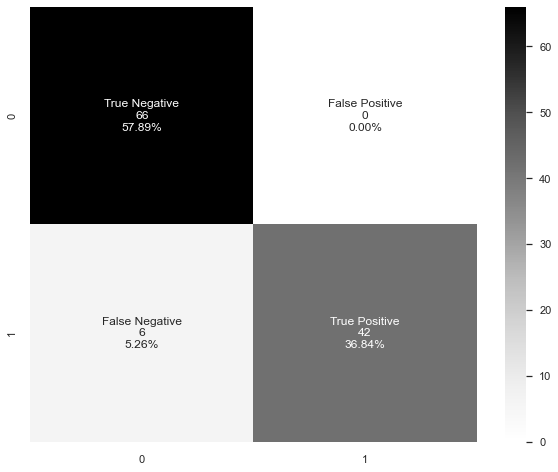

In [124]:
KnnTun_y_pred = KnnTun.predict(x_test)
KnnTun_cf_matrix = confusion_matrix(y_test, KnnTun_y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in KnnTun_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in KnnTun_cf_matrix.flatten()/np.sum(KnnTun_cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(KnnTun_cf_matrix, annot=labels, fmt='', cmap='Greys')

### Conclusion

In conclusion, here are the steps that we took in order to accomplish this project:
1. **Data Loading**: Explore and Analyse Data. Drop Empty Column.
2. **Data Visualization**: Present Data using various graphs and charts such as:
    - Bar Graph
    - Multi-Histogram
    - Box Plot
3. **Data Pre-Processing**: Prepare Data for Modeling
    - Label Encoder for target variable
    - Standard Scaler for numerical features
    - Preparing Starting Features (Corr Value > 0.7; 8 Features) and Labels
    - Splitting into Training and Test Set (Test-Size: 0.2)
4. **Data Modeling**: Training our Models.
    - Model Selection : Support Vector Mechine classifier and KNears Neighbors Classifier
    - Model Fitting
5. **Data Evaluation**: Evaluate our Trained Model, through various Steps:
    1. *Model Evaluation Metrics:*
        - Confusion Matrix
        - Classification Report

In this project we have trained our models for a total of 3 times. <br>
The following shows the model F1 Score in predicting the test set for every stage:
1. **Basic Starting Model:**
    - *Support Vector Machine :* 92%
    - *K Nearest Neighbors :* 94%
2. **Model After Hyperparameter Tuning:**
    - *Support Vector Machine :* 95%
    - *K Nearest Neighbors :* 94%
